#DS 203 - Programming for Data Science
##Assigment 6

In the first code cell I have imported all the necessary libraries required for the assignment.<br>
I read the csv file and printed it.

In [46]:
import pandas as pd
import numpy as np
import seaborn as sb
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statistics as st

df = pd.read_csv('master.csv') #used read_csv to read the data
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In this code cell I performed data cleaning.<br>
The data is mostly clean just that the gdp for year data is in string and to convert it to integer, I first removed the commas and then used astype for type conversion

In [47]:
for i in df.columns:
    print(df[i].unique())#printing unique values in each column
df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].str.replace(',', '').astype(np.int64) #used str.replace to replace the commas and astype to convert in to integer
df[' gdp_for_year ($) ']


['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'
 'South 

0         2156624900
1         2156624900
2         2156624900
3         2156624900
4         2156624900
            ...     
27815    63067077179
27816    63067077179
27817    63067077179
27818    63067077179
27819    63067077179
Name:  gdp_for_year ($) , Length: 27820, dtype: int64

In this cell I performed general EDA.<br>
For EDA I first sorted the data according to suicides/100k pop and then plotted scatter plot for the rows having highest suicides/100k pop values.<br>
I observed that the year 1995 had the highest suicides/100k pop value. <br>
Also in the top hundred data of suicides most of them were that of men. <br>
Also the age group of 75+ years had the highest suicides/100k pop value.

22520    1995
22004    2001
23168    2006
4616     1991
4676     1996
         ... 
20530    2010
20542    2011
24332    2012
22280    2006
1258     1995
Name: year, Length: 100, dtype: int64


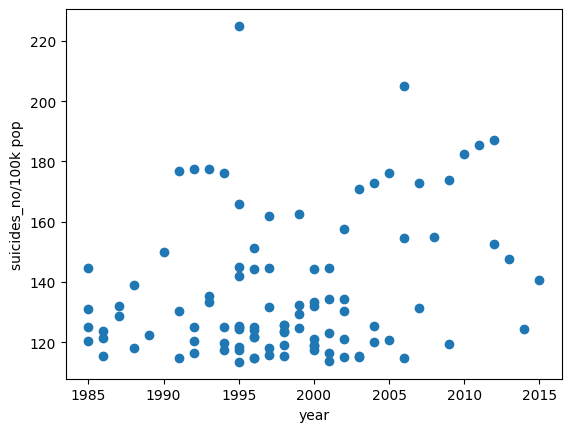

22520    male
22004    male
23168    male
4616     male
4676     male
         ... 
20530    male
20542    male
24332    male
22280    male
1258     male
Name: sex, Length: 100, dtype: object


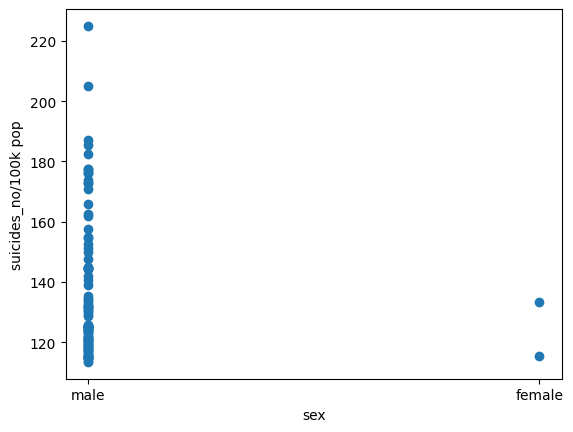

22520    75+ years
22004    75+ years
23168    75+ years
4616     75+ years
4676     75+ years
           ...    
20530    75+ years
20542    75+ years
24332    75+ years
22280    75+ years
1258     75+ years
Name: age, Length: 100, dtype: object


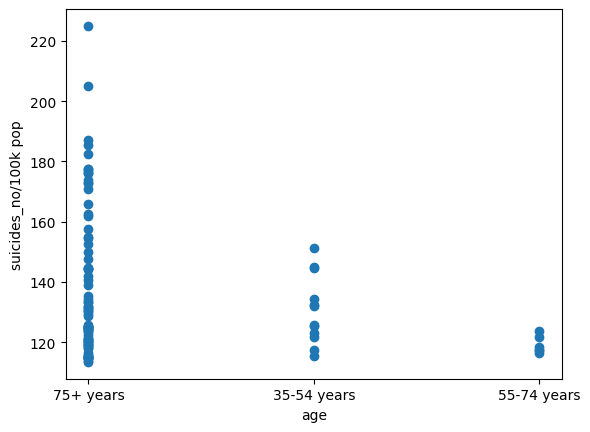

In [48]:
for i in range(1, 4): #loop for columns 2, 3, 4
    print(df.sort_values('suicides/100k pop').iloc[-100:, i]) #sorted valued in ascending order wrt suicides/100k pop
    plt.scatter( df.sort_values('suicides/100k pop').iloc[-100:, i], df.sort_values('suicides/100k pop').iloc[-100:, 6]) #ploted scatter plots for the last 100 data
    plt.xlabel(df.columns[i]) 
    plt.ylabel('suicides_no/100k pop')
    plt.show()

    


In the following code cell I printed the modes of all discrete values.
(I think there is some issue in colab but the code is working fine on vs code)

In [49]:

discrete = [ 'age', 'sex', 'generation', 'year', 'country', 'suicides_no'] #list of discrete variables
for items in discrete:
    print(st.mode(df[items])) #used mode function from statistics library 

15-24 years
male
Generation X
2009
Austria
0


In the following cell I calculated the entropy of all the discrete variables using the formula given to us.

In [50]:
import math #math library for log 
for i in discrete:
    entropy = 0
    df1 = df[i].value_counts()
    for items in df[i].unique(): #loop over the unique values in each discrete variable column
        entropy += df1[items]/len(df)*math.log(df1[items]/len(df)) #summing over the data according to the formula
    print("The entropy of ", i ," is ", -1*entropy) #multiplying final result by -1 according to the formula




The entropy of  age  is  1.7917561564428144
The entropy of  sex  is  0.6931471805599453
The entropy of  generation  is  1.695449187635522
The entropy of  year  is  3.432956123756321
The entropy of  country  is  4.512115046503916
The entropy of  suicides_no  is  5.243743260095325


Calculated mean, variance, skew, min, max, median, 25th and 75th percentile, and inter-quartile range for all the continous variables. <br>
Used different libraries like statistics, numpy for various functions.



In [51]:
continuous = ['population', 'suicides/100k pop', 'gdp_per_capita ($)'] #list of continous variables
for item in continuous:
    print(item)
    print("Mean: ", df[item].mean()) #used mean function to calculate mean
    print("Variance ", st.variance(df[item])) #used variance function of statistics library to calculate mean
    print("Skew: ", df.skew()[item]) #used skew function to calculate skew for all continous varibles
    print("Min: ", df[item].min())
    print("Max: ", df[item].max())
    print("Median: ", df[item].median())
    print("25th Percentile: ", np.percentile(df[item], 25)) #used the percentile function of numpy to calculate 25th and 75th percetile
    print("75th Percentile: ", np.percentile(df[item], 75))
    print("Inter-quartile range: ", np.percentile(df[item], 75)-np.percentile(df[item], 25)) #subtracted 25th percentile from 75th percentile to print inter-quartile range
    print()


population
Mean:  1844793.6173975556
Variance  15302018400947.725
Skew:  4.459414421535874
Min:  278
Max:  43805214
Median:  430150.0
25th Percentile:  97498.5
75th Percentile:  1486143.25
Inter-quartile range:  1388644.75

suicides/100k pop
Mean:  12.816097411933864
Variance  359.5388999531261
Skew:  2.963414476605633
Min:  0.0
Max:  224.97
Median:  5.99
25th Percentile:  0.92
75th Percentile:  16.62
Inter-quartile range:  15.700000000000001

gdp_per_capita ($)
Mean:  16866.464414090584
Variance  356740544.9934135
Skew:  1.9634699942792686
Min:  251
Max:  126352
Median:  9372.0
25th Percentile:  3447.0
75th Percentile:  24874.0
Inter-quartile range:  21427.0



/var/folders/37/q5mv6wgn111btdl3yp4ghpym0000gn/T/ipykernel_24246/31174701.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("Skew: ", df.skew()[item]) #used skew function to calculate skew for all continous varibles
/var/folders/37/q5mv6wgn111btdl3yp4ghpym0000gn/T/ipykernel_24246/31174701.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("Skew: ", df.skew()[item]) #used skew function to calculate skew for all continous varibles
/var/folders/37/q5mv6wgn111btdl3yp4ghpym0000gn/T/ipykernel_24246/31174701.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version th

Made box and whiskers plot for each continous varible using matplotlib.pyplot.<br>
Used the log function as the data was varied.

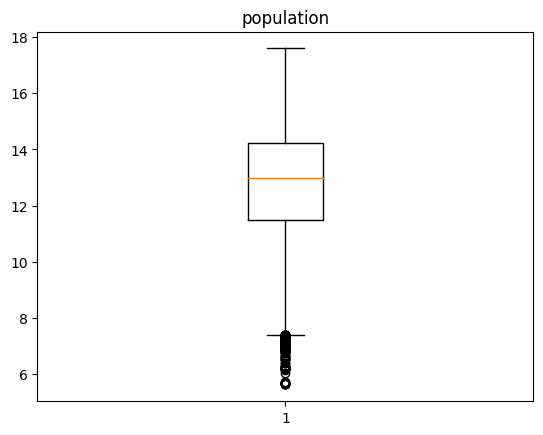

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


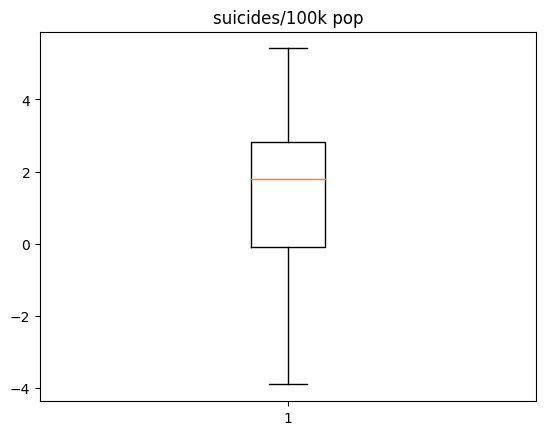

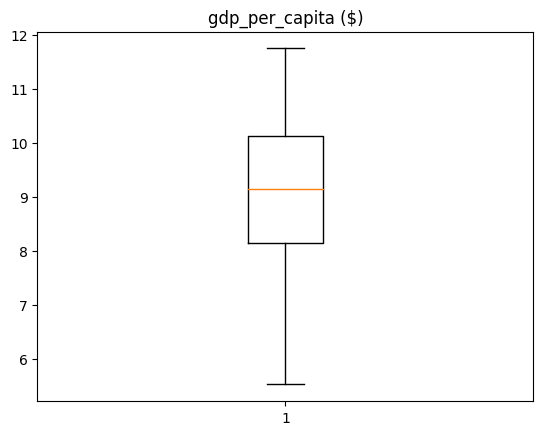

In [52]:
for items in continuous:
    plt.boxplot(np.log(df[items])) #used log function from numpy for better plots
    plt.title(items)
    plt.show()
    

##Histograms with too low bins
I used 5 bins for each continous variable as too low no. of bins

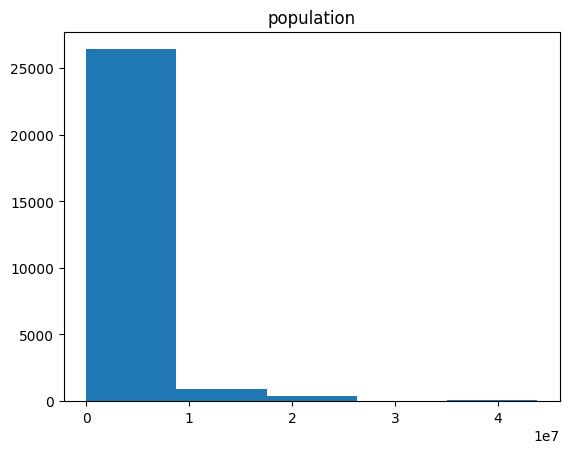

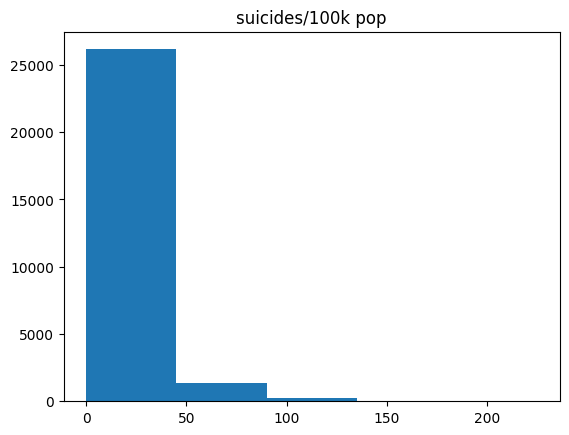

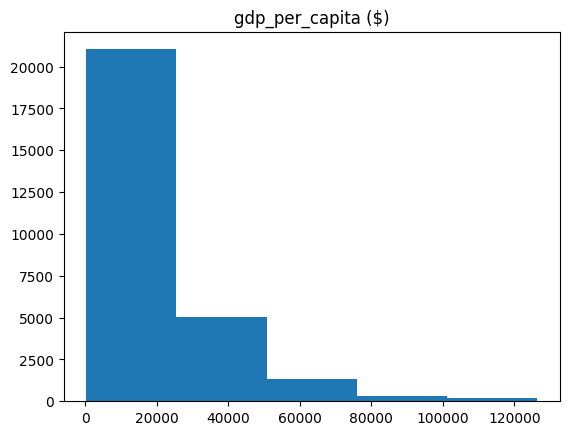

In [53]:
for item in continuous:
    plt.hist(df[item], bins=5) #hist function with bins mentioned as 5 for plotting histogram
    plt.title(item)
    plt.show()

##Histograms with too high bins
I used 500 bins for each continous variable as too high no. of bins

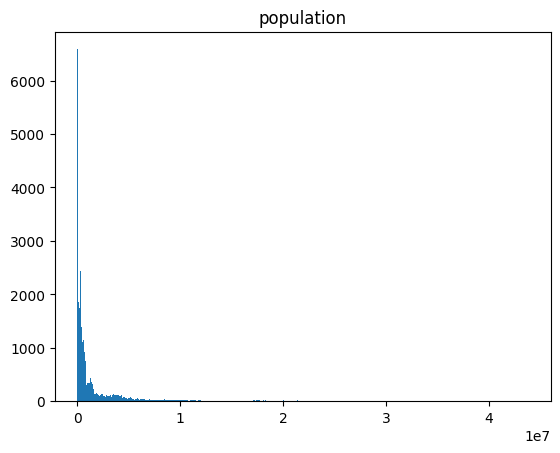

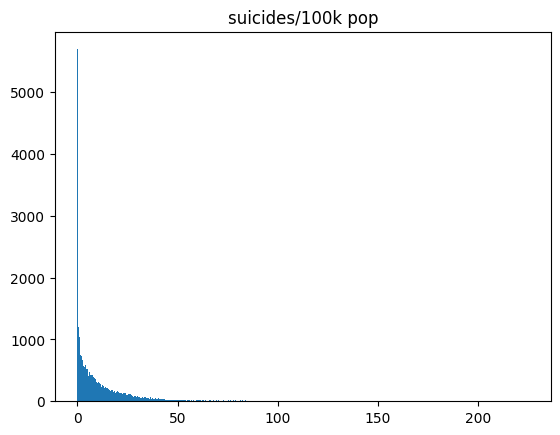

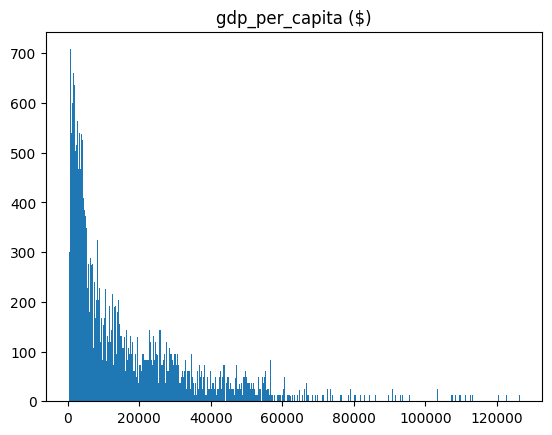

In [54]:
for item in continuous:
    plt.hist(df[item], bins=500) #hist function with bins mentioned as 500 for plotting histogram
    plt.title(item)
    plt.show()

##Histograms with moderate bins
I used 20 bins for each continous variable as moderate no. of bins

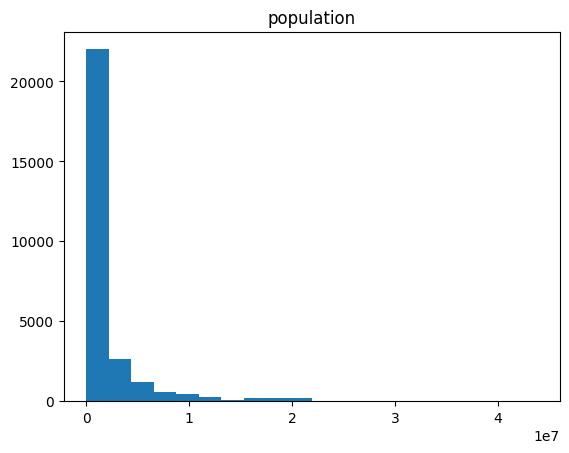

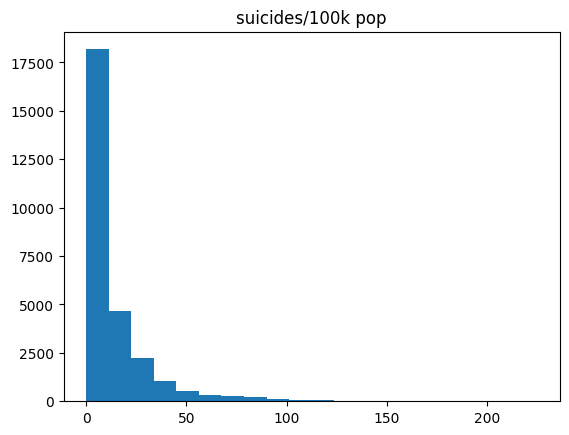

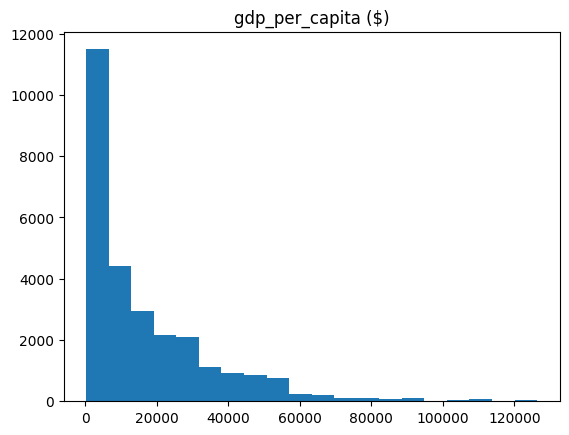

In [55]:
for item in continuous:
    plt.hist((df[item]), 20) #used bins=20 as moderate no. of bins
    plt.title(item)
    plt.show()

Used the heatman function of seaborn to make a heatmap of correlation between all pairs of continous variables.

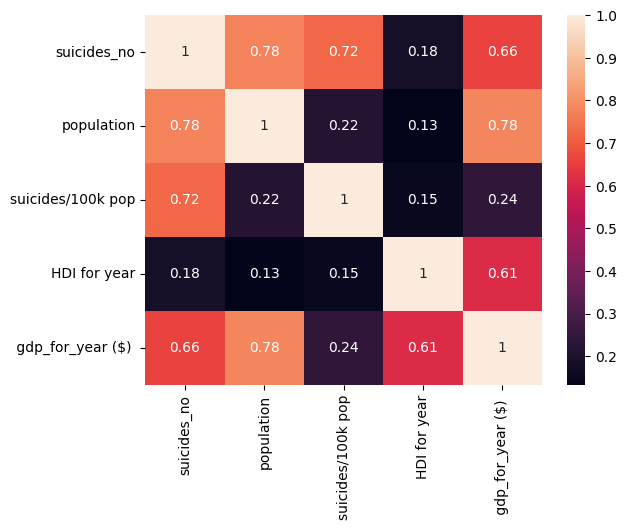

In [56]:
corrMatrix = df.iloc[:, 3:10].corr(method='spearman') # used iloc to get the dataset of continous variables
sb.heatmap(corrMatrix, annot=True) # used heatmap function to plot the correlation matrix and enabled the annotation
plt.show()

In the following cell I picked the top six countries by average yearly suicides.

In [57]:
df1 = df.groupby('country') #used groupby to group the data by country
list1=[] 
dict={}
for item in df['country'].unique():
    list1.append(df1.get_group(item)['suicides_no'].mean()) #calculated the yearly suicides for each country and appended in a list
j=0
for i in df['country'].unique():
    dict[i] = list1[j] #made a dictionary with keys as the country name and values as the average yearly suicide
    j +=1
print(dict)
country=[]
for i in sorted(dict.values())[-6:]:
    value = [j for j in dict if dict[j]==i]
    country.append(value[0]) #stored the names of the top 6 countries in a variable named country
print()
print(country)





{'Albania': 7.462121212121212, 'Antigua and Barbuda': 0.033950617283950615, 'Argentina': 221.0188172043011, 'Armenia': 6.39261744966443, 'Aruba': 0.6011904761904762, 'Australia': 194.75277777777777, 'Austria': 131.08115183246073, 'Azerbaijan': 8.625, 'Bahamas': 0.33695652173913043, 'Bahrain': 1.8373015873015872, 'Barbados': 0.59, 'Belarus': 237.66666666666666, 'Belgium': 168.71236559139786, 'Belize': 1.0357142857142858, 'Bosnia and Herzegovina': 13.25, 'Brazil': 609.1747311827957, 'Bulgaria': 101.07777777777778, 'Cabo Verde': 3.5, 'Canada': 309.0833333333333, 'Chile': 109.93279569892474, 'Colombia': 142.68817204301075, 'Costa Rica': 18.866666666666667, 'Croatia': 70.33969465648855, 'Cuba': 143.8125, 'Cyprus': 2.3146067415730336, 'Czech Republic': 135.67391304347825, 'Denmark': 57.94318181818182, 'Dominica': 0.0, 'Ecuador': 55.53763440860215, 'El Salvador': 40.56597222222222, 'Estonia': 27.91269841269841, 'Fiji': 2.303030303030303, 'Finland': 96.77298850574712, 'France': 914.24166666666

Plotted the suicides for each year for the top 6 countries

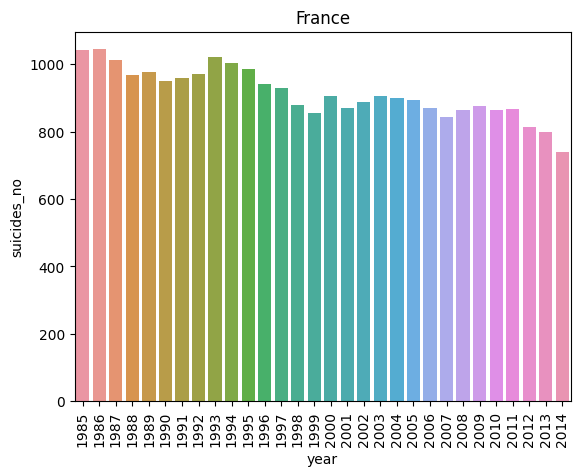

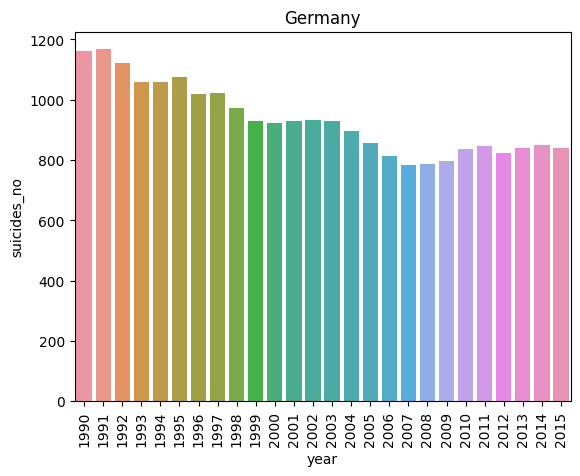

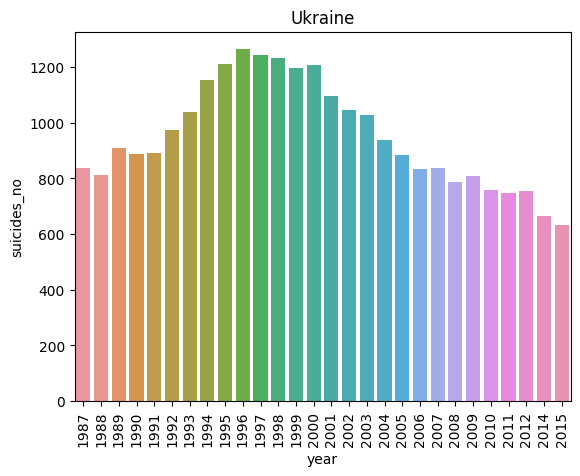

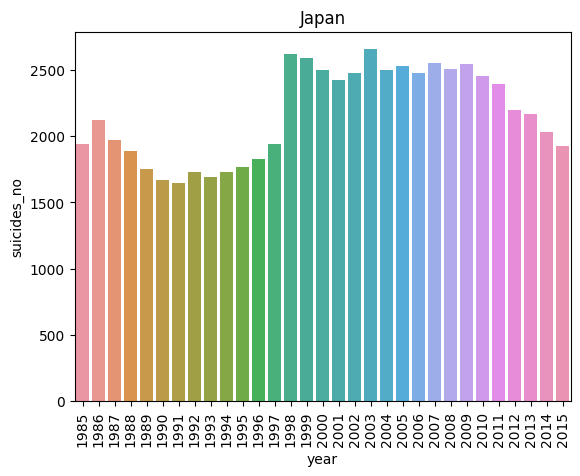

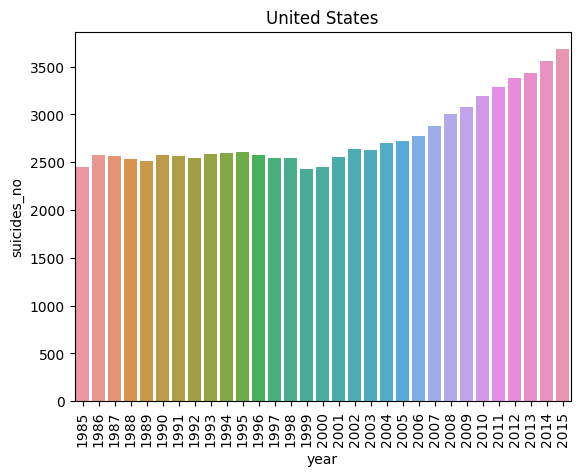

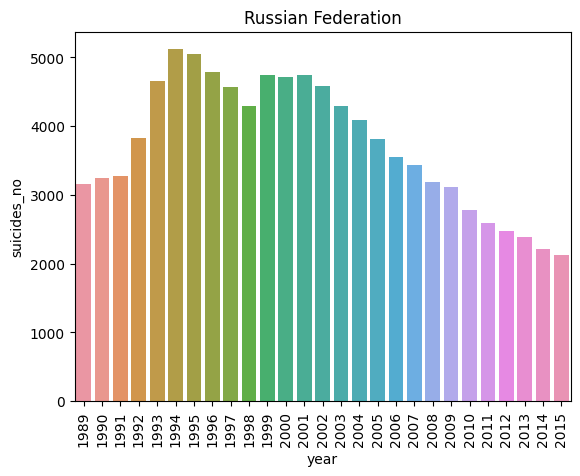

In [58]:
for item in country:
    sb.barplot(x=df1.get_group(item)["year"],y=df1.get_group(item)["suicides_no"], ci=None) #used the barplot function from seaborn to plot the suicides for each year
    plt.title(item)
    plt.xticks(rotation=90)
    plt.show()


Compared the age groups for each of the six countries.<br>
For each country most no. of suicides are commited by people of in the age group of 35-54 years.

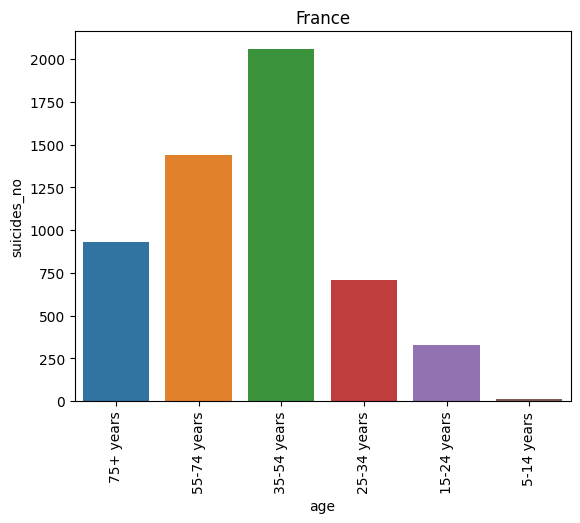

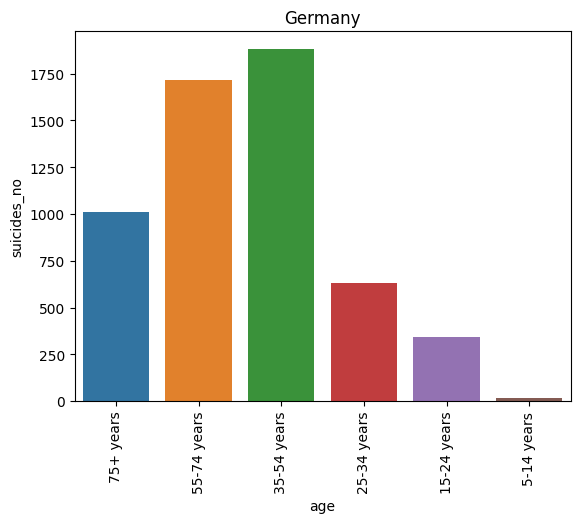

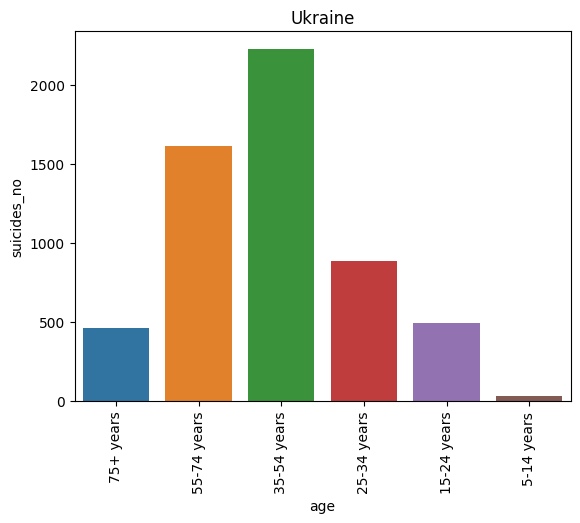

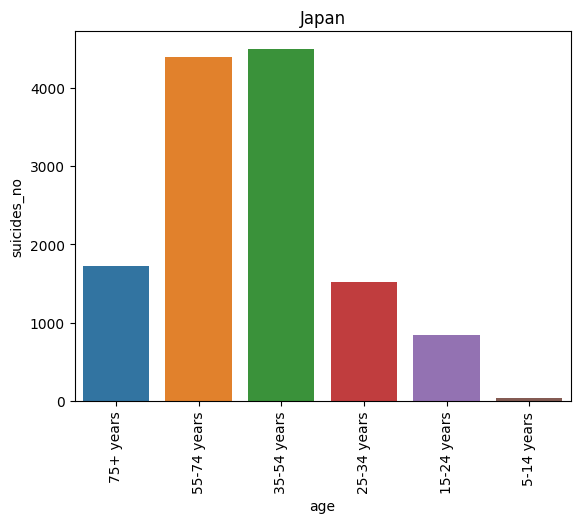

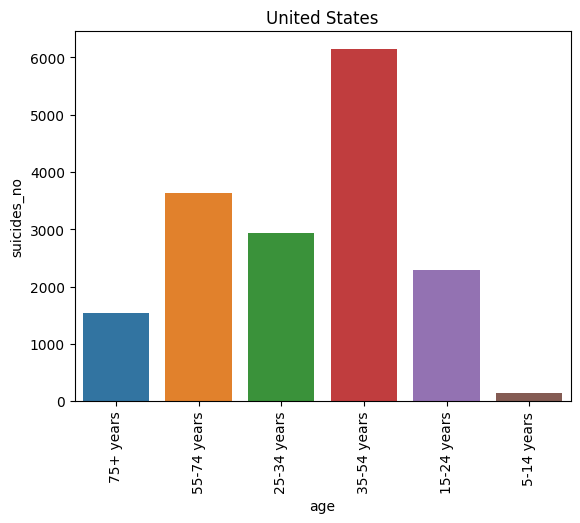

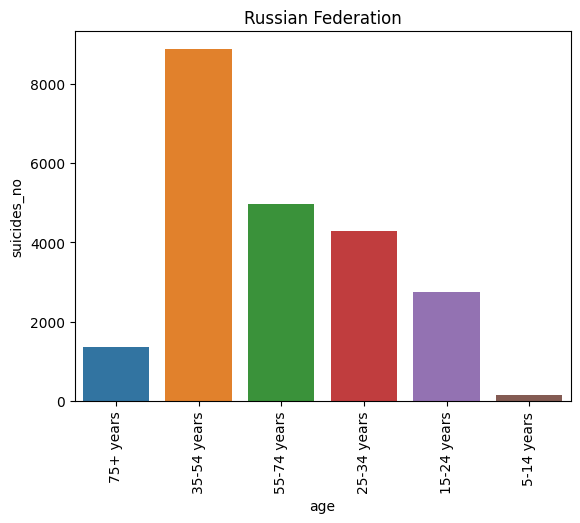

In [59]:
for item in country:
    sb.barplot(x=df1.get_group(item)["age"],y=df1.get_group(item)["suicides_no"], ci=None) #used the barplot function of seaborn to plot bar graphs of different age groups for each coutnry
    plt.title(item) 
    plt.xticks(rotation=90) #rotated the xlabes by 90 degrees
    plt.show()


Plotted a line plot to highlight the consistency of difference between men and women for different years.

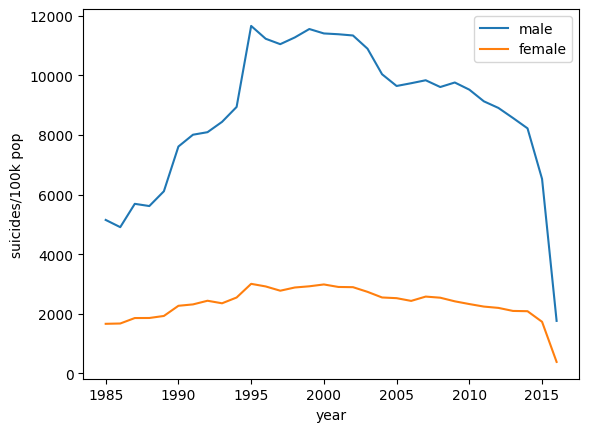

In [60]:
filterMale = df['sex']=='male' #created a filter for males
filterFemale = df['sex']=='female' #created a filter for females
df4 = df[filterMale] #filtered data wrt males
df5= df[filterFemale] #filtered data wrt females

df6 = df4.groupby(by='year').sum() #grouping data according to years and and summing the suicides/100k pop for a particular year
df7 = df5.groupby(by='year').sum()

sb.lineplot(x=df6.index, y=df6['suicides/100k pop'],label='male') #plotted the line plot for the males according to suicides/100k pop
sb.lineplot(x=df7.index, y=df7['suicides/100k pop'],label='female') #plotted the line plot for the females according to suicides/100k pop
plt.show()

Used the barplots to check which is the worst generation for the country US over the years. <br>
Worst years:
Generation X: 2015
Silent: 1990
G.I. Generation: 1987
Boomers: 2009
Milenials: 2015
Generation Z: 2014

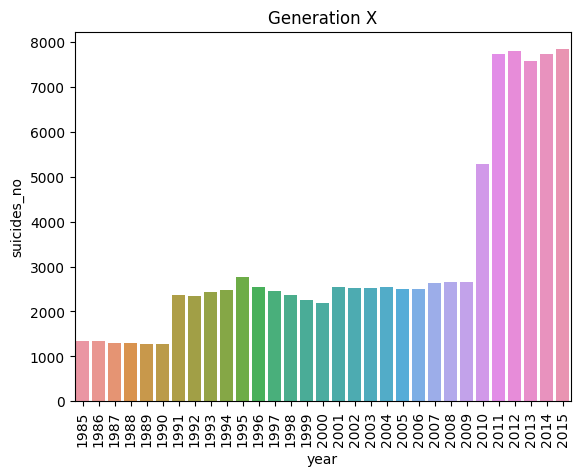

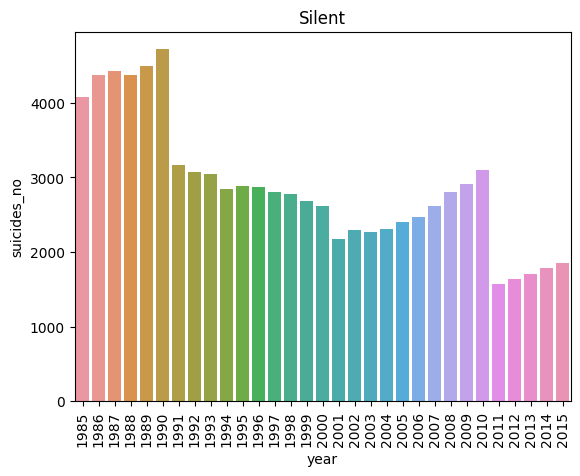

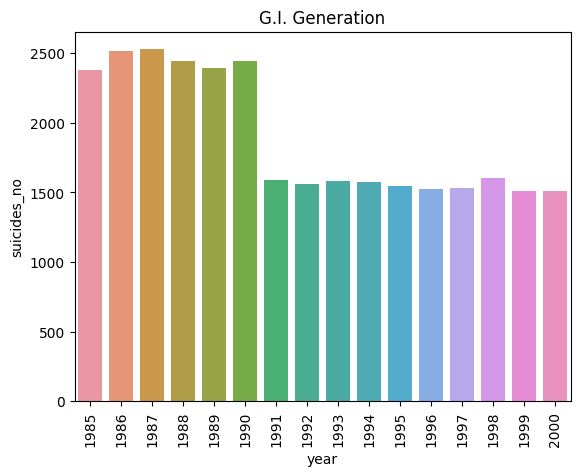

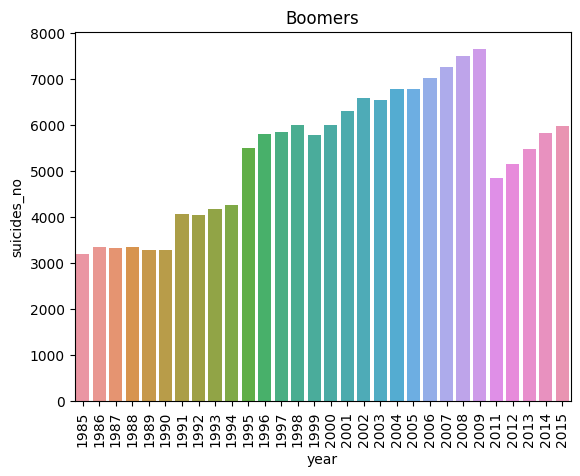

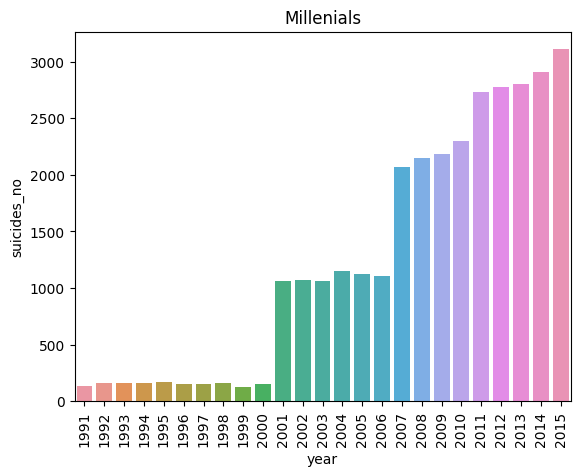

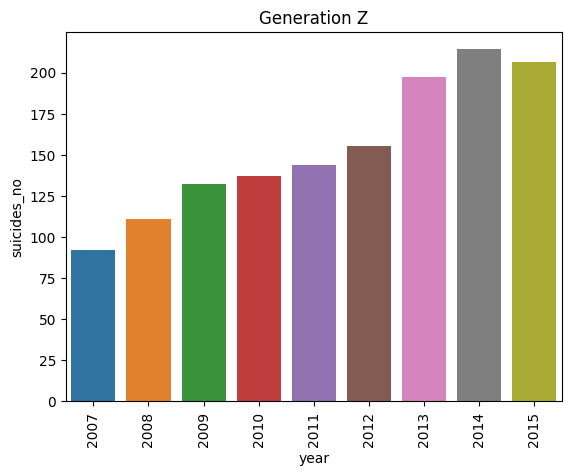

In [61]:
df2 = df.groupby('country') #grouped data wrt countries
a = df2.get_group('United States') 
b = a.groupby('generation')

for item in df['generation'].unique():
    sb.barplot(x=b.get_group(item)['year'], y=b.get_group(item)['suicides_no'], ci=None) #plotted bar plot for each geneartion of no. of suicides per year
    plt.title(item)
    plt.xticks(rotation=90)
    plt.show()

Plotted a bihistogram for the top six countries for the year 2000 to show the sex ratio in the various age groups

/var/folders/37/q5mv6wgn111btdl3yp4ghpym0000gn/T/ipykernel_24246/3264048538.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df4[filterCountry]
/var/folders/37/q5mv6wgn111btdl3yp4ghpym0000gn/T/ipykernel_24246/3264048538.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax.bar(df3[column]['age'],df3[column]['population'],  color=color)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/37/q5mv6wgn111btdl3yp4ghpym0000gn/T/ipykernel_24246/3264048538.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax.bar(df3[column]['age'],df3[column]['population'],  color=color)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/37/q5mv6wgn111btdl3yp4ghpym0000gn/

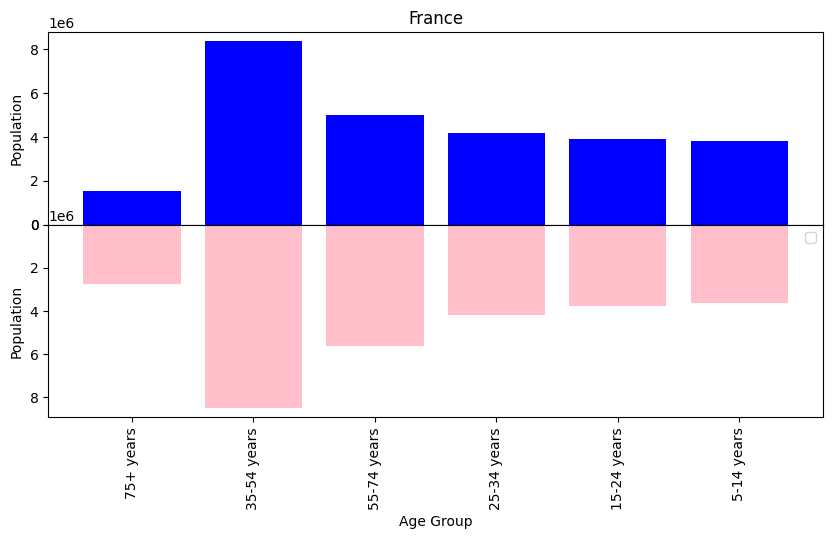

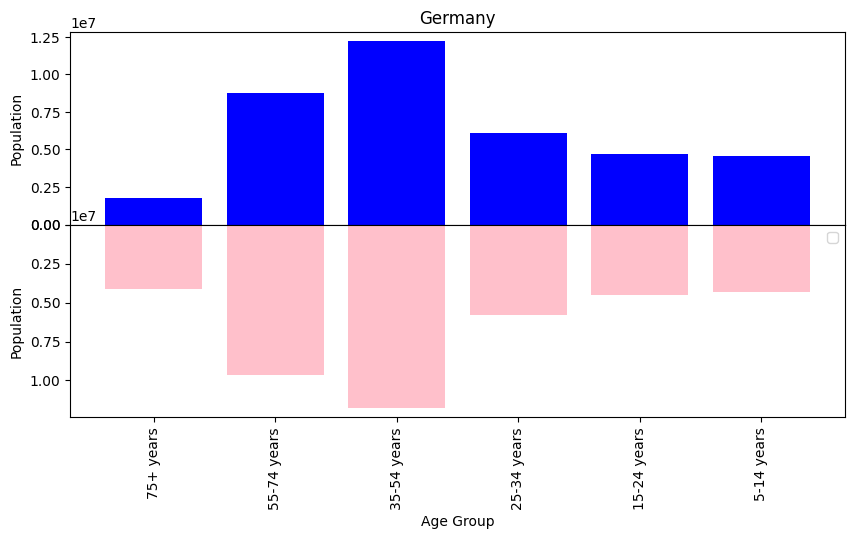

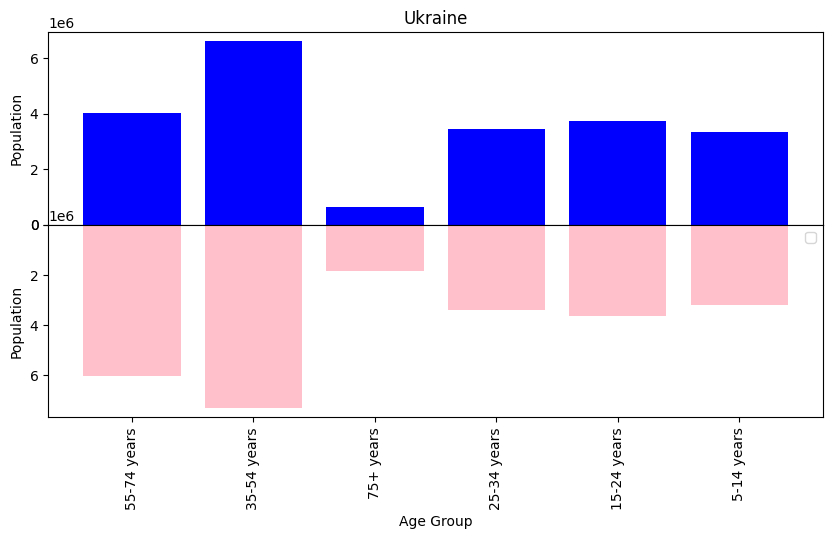

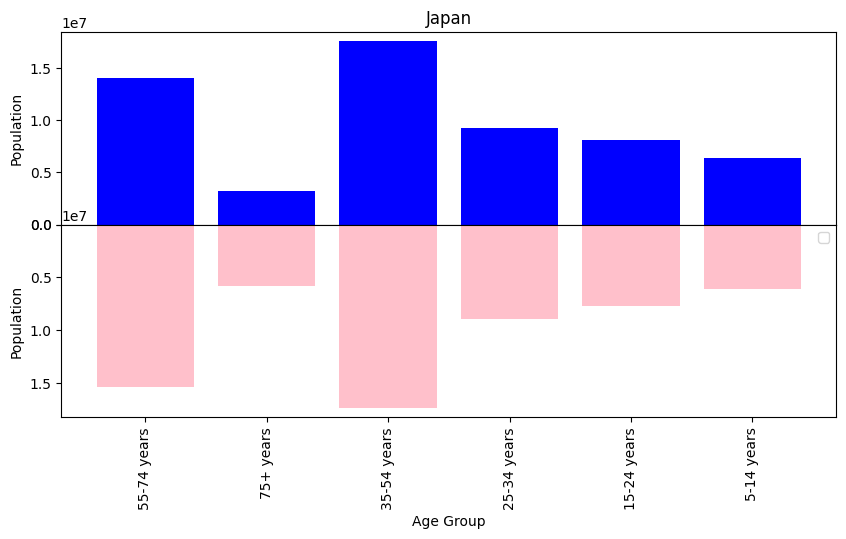

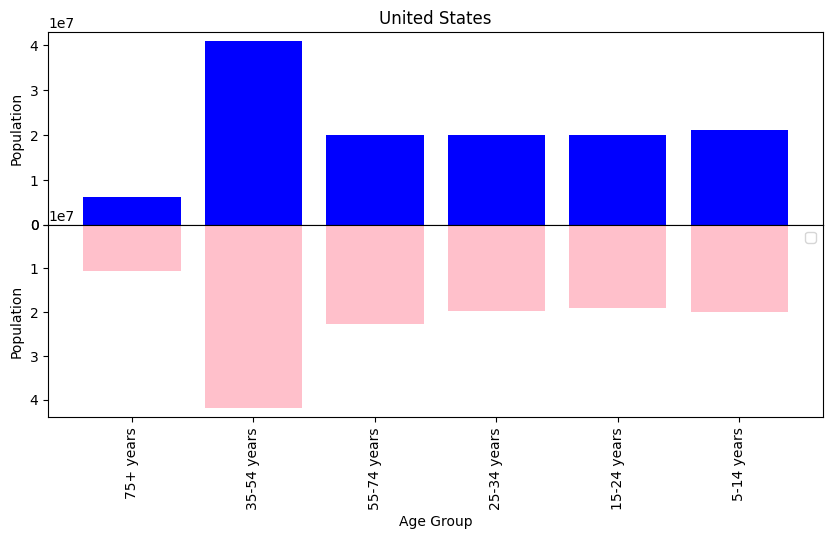

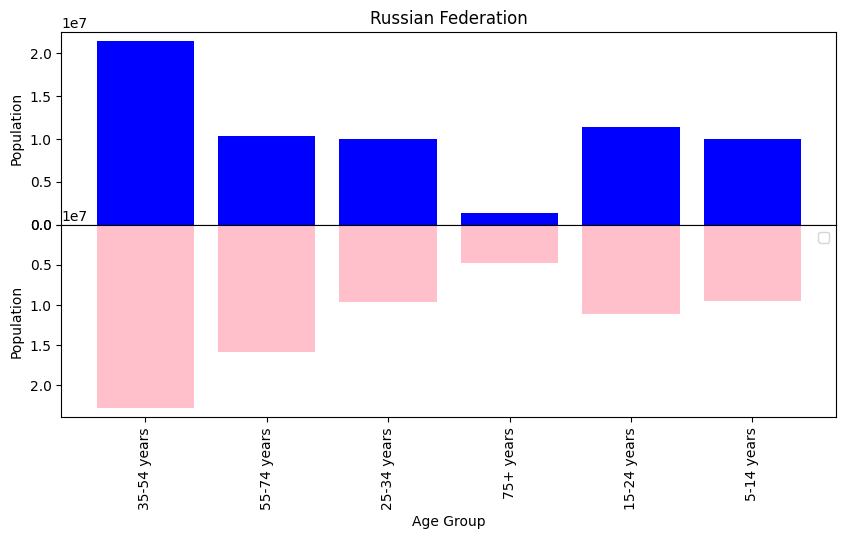

In [62]:
df4=df[df['year']==2000] #filtered data for the year 2000

for item in country:
    filterCountry = df['country'] == item #used the list of the top six countries and filted according a particular country
    df3 = df4[filterCountry]
    fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,5)) 
        # seelcting an axis, clor and data for each plot
    for ax, column, color, invert in zip(axes.ravel(), [filterMale, filterFemale], ['blue', 'pink'],  [False,True]): #implemented a loop with 4 variables for axes, male or female population, whether to invert the table
        ax.bar(df3[column]['age'],df3[column]['population'],  color=color)
        plt.xticks(rotation=90)
        plt.legend()
        ax.set(xlabel='Age Group',ylabel='Population')
        if invert:
                ax.invert_yaxis() #to invert the female plot
        else :
            ax.set_title(item)
        # To make the space between both the histograms 0 and stick them together
    plt.subplots_adjust(hspace=0)

Did a bubble plot to show the relation between suicide rates, HDI and population.<br>
With HDI as x-axis, log of population as y-axis, and suicides/100k pop as representing bubble size

Text(0.5, 1.0, 'Bubble Plot with Matplotlib')

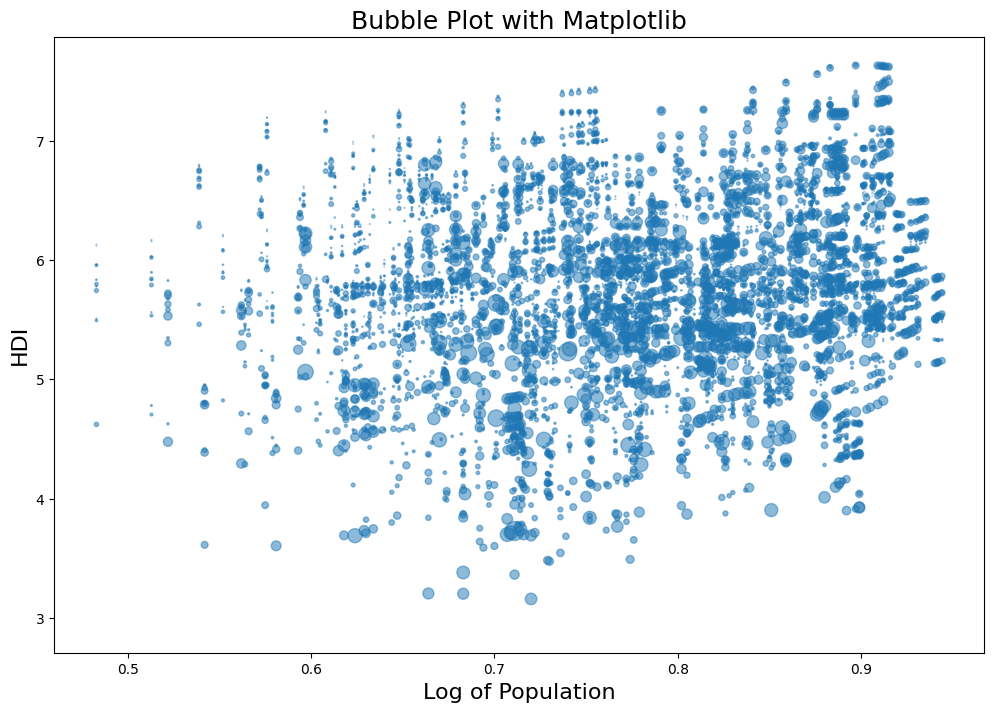

In [63]:
from cmath import log
# df['population']=log(df['population'])
df.dropna()
y = np.log10(df['population'])
x= df['HDI for year']
z= df['suicides/100k pop']
plt.figure(figsize=(12,8))
plt.scatter(x, y, 
             s=z,
             alpha=0.5, 
             )
plt.xlabel("Log of Population", size=16)
plt.ylabel("HDI", size=16)
plt.title("Bubble Plot with Matplotlib", size=18)




References:
https://www.geeksforgeeks.org/ (for certain functions)<br>
https://stackoverflow.com/<br>
https://pandas.pydata.org/<br>
